In [162]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
pd.set_option('display.max_columns', None)

# Read in and Clean the Data
Using pandas we will read in our dataset into a dataframe. If we look at the first five rows of the data, we can see that it has already been dummified for us. While this is helpful for modelling, this may prove problematic for our visualizations as we will want to look at the effect different soil-types or different Wilderness Areas and will not want a binary option.

In [27]:
df = pd.read_csv("covtype.csv")
# df.info()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


### Converting Dummies back to Categorical

In [128]:
soil_columns = df.iloc[:,range(-42,-2)].columns
soil_columns_list = list(soil_columns)

iteration=-1

for col in soil_columns:
    iteration+=1
    soil_columns_list[iteration] = df.loc[df[col]==1,:]

In [131]:
# soil_columns_list[0]
iteration=0
for i in soil_columns_list:
    iteration+=1
    i['Soil_Type']=iteration

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [135]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40',
       'Cover_Type', 'Wilderness_Area'],
      dtype='object')

### Dropping dummy columns and recreating dataframe

In [146]:
df_no_dummies = pd.concat(soil_columns_list).reset_index()
df_no_dummies = df_no_dummies.drop(columns=['index','Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'])

df_no_dummies

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2173,50,28,124,100,212,219,167,64,552,3,4,1
1,2161,113,32,458,142,524,254,188,34,390,3,4,1
2,2110,54,25,342,150,390,225,177,71,466,3,4,1
3,2206,65,33,210,144,201,229,155,31,361,3,4,1
4,2132,73,27,365,172,408,239,179,53,488,3,4,1
5,2162,166,33,277,143,543,226,230,107,242,3,4,1
6,2143,170,32,247,124,547,223,234,116,258,3,4,1
7,2129,197,33,242,110,598,191,245,164,324,3,4,1
8,2151,177,23,295,134,481,224,245,140,430,3,4,1
9,2077,99,26,285,117,331,252,194,54,518,3,4,1


In [28]:
df_wilderness_area_1 = df.loc[df['Wilderness_Area1']==1,:]
df_wilderness_area_2 = df.loc[df['Wilderness_Area2']==1,:]
df_wilderness_area_3 = df.loc[df['Wilderness_Area3']==1,:]
df_wilderness_area_4 = df.loc[df['Wilderness_Area4']==1,:]

In [33]:
df_wilderness_area_1['Wilderness_Area']=1
df_wilderness_area_2['Wilderness_Area']=2
df_wilderness_area_3['Wilderness_Area']=3
df_wilderness_area_4['Wilderness_Area']=4

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [47]:
dataframes=[df_wilderness_area_1,df_wilderness_area_2,df_wilderness_area_3,df_wilderness_area_4]
df = pd.concat(dataframes).drop(columns=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])

In [51]:
df.Wilderness_Area.value_counts()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1
1,2590,56,2,212,-6,390,220,235,151,6225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1
2,2804,139,9,268,65,3180,234,238,135,6121,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1


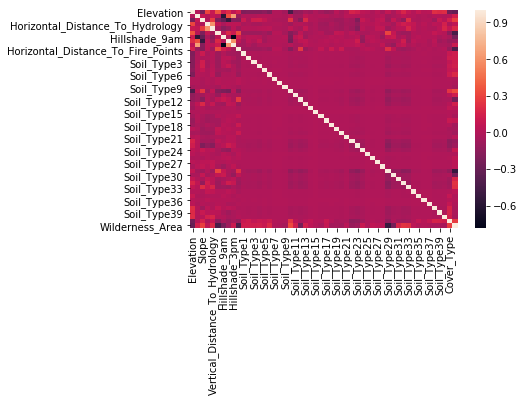

In [86]:
sns.heatmap(df.corr())

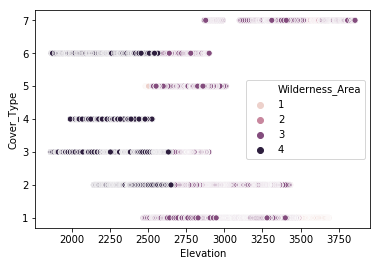

In [60]:
sns.scatterplot(data=df,hue='Wilderness_Area',y='Cover_Type',x='Elevation')

In [168]:
df_covergroups_mean = df.groupby('Cover_Type').mean()
df_wilderness_area_mean = df.groupby('Wilderness_Area').mean().reset_index()

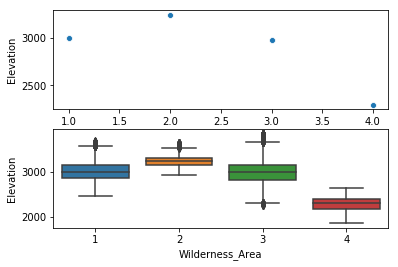

In [171]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_wilderness_area_mean,x='Wilderness_Area',y='Elevation',ax=axes[0])
sns.boxplot(data=df,x='Wilderness_Area',y='Elevation',ax=axes[1])

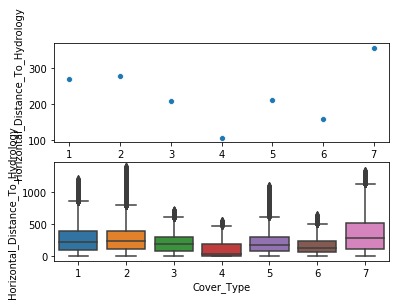

In [77]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Hydrology",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Hydrology",ax=axes[1])



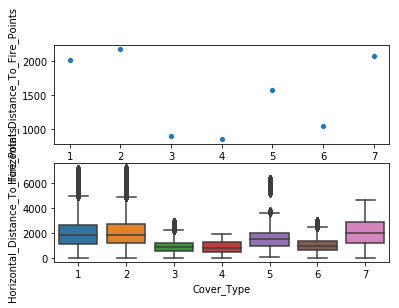

In [81]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Fire_Points",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Fire_Points",ax=axes[1])

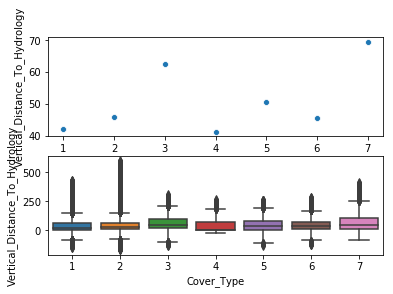

In [79]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Vertical_Distance_To_Hydrology",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Vertical_Distance_To_Hydrology",ax=axes[1])

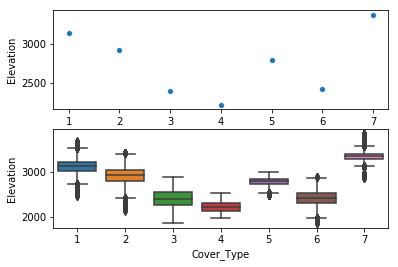

In [80]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Elevation",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Elevation",ax=axes[1])

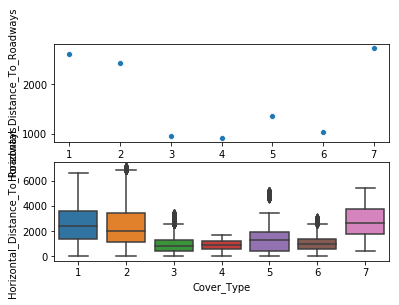

In [98]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Roadways",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Roadways",ax=axes[1])

In [148]:
df = df_no_dummies
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2173,50,28,124,100,212,219,167,64,552,3,4,1
1,2161,113,32,458,142,524,254,188,34,390,3,4,1
2,2110,54,25,342,150,390,225,177,71,466,3,4,1
3,2206,65,33,210,144,201,229,155,31,361,3,4,1
4,2132,73,27,365,172,408,239,179,53,488,3,4,1


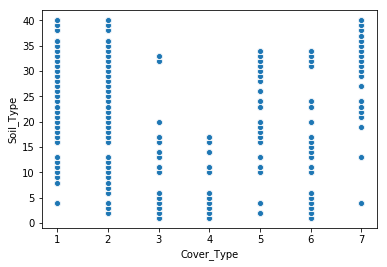

In [150]:
sns.scatterplot(data=df,y='Soil_Type',x='Cover_Type')

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


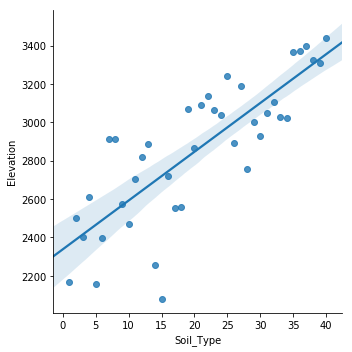

In [161]:
df_soils_mean = df.groupby("Soil_Type").mean()
df_soils_mean = df_soils_mean.reset_index()

sns.lmplot(data=df_soils_mean,x='Soil_Type',y='Elevation')

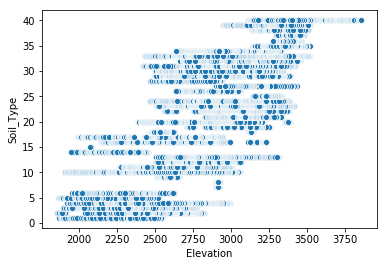

In [151]:
sns.scatterplot(data=df,y='Soil_Type',x='Elevation')